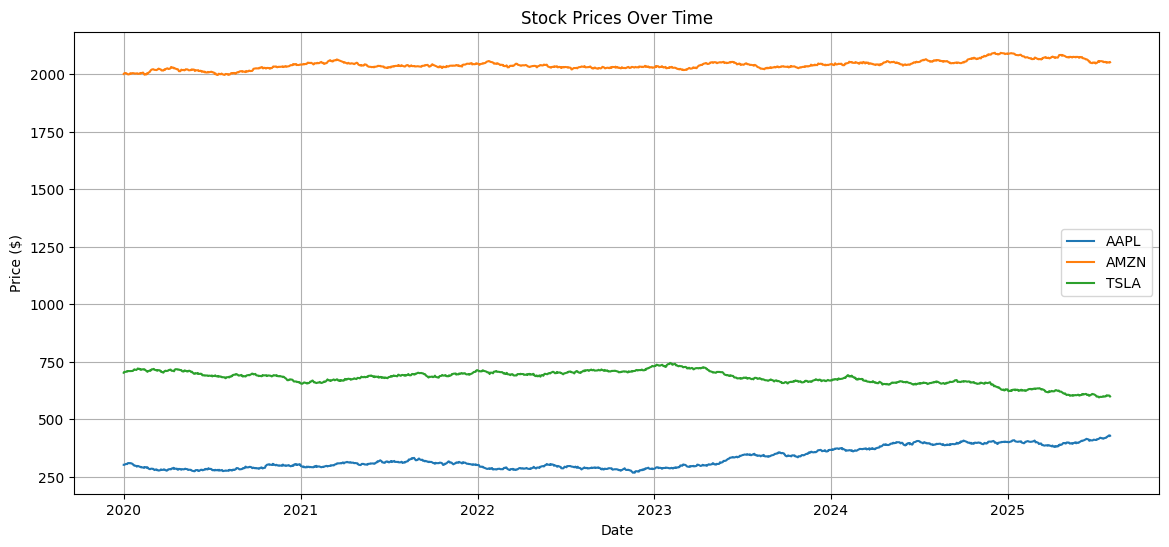

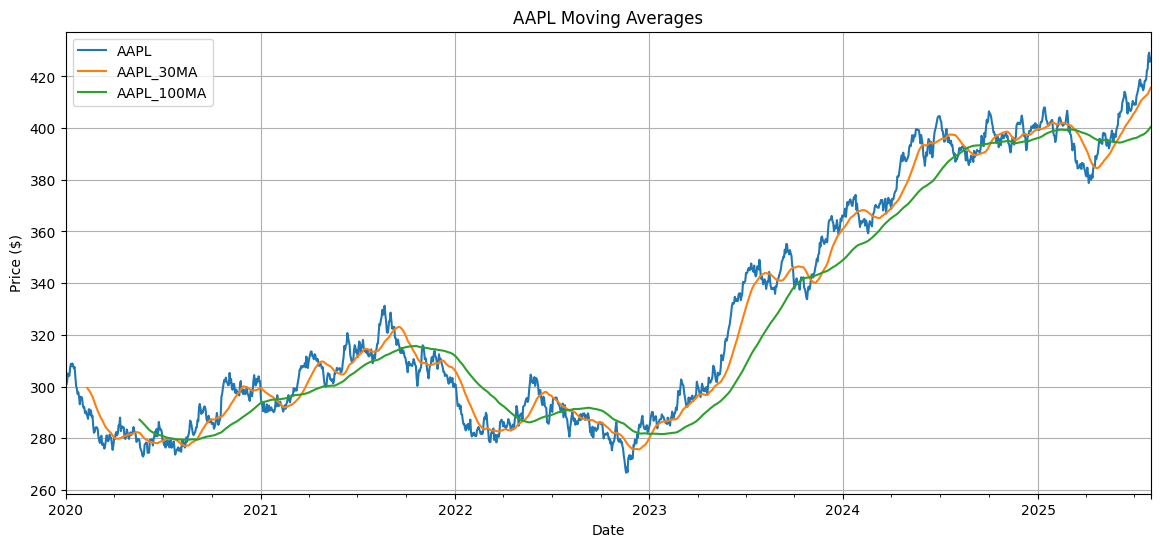

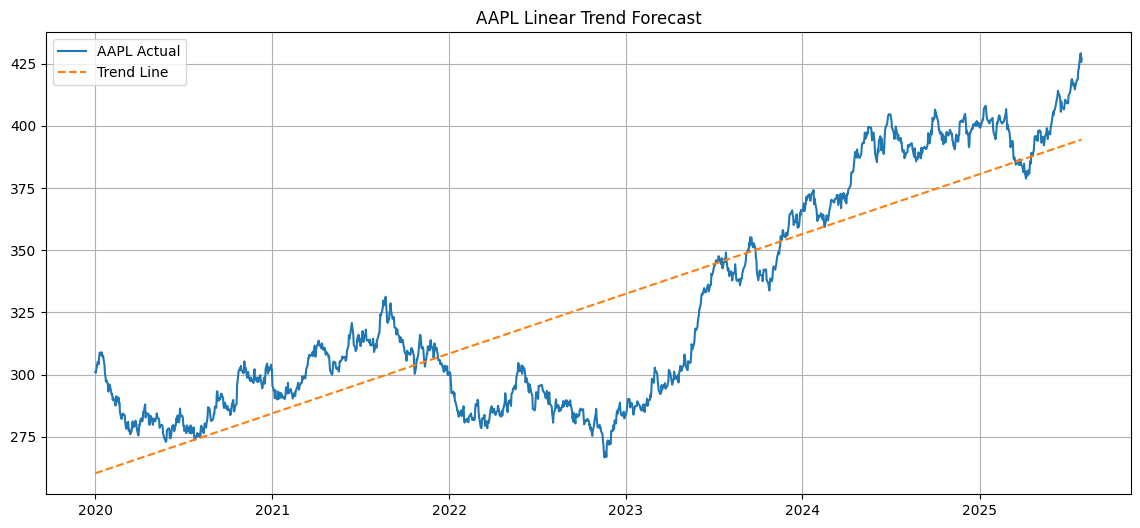

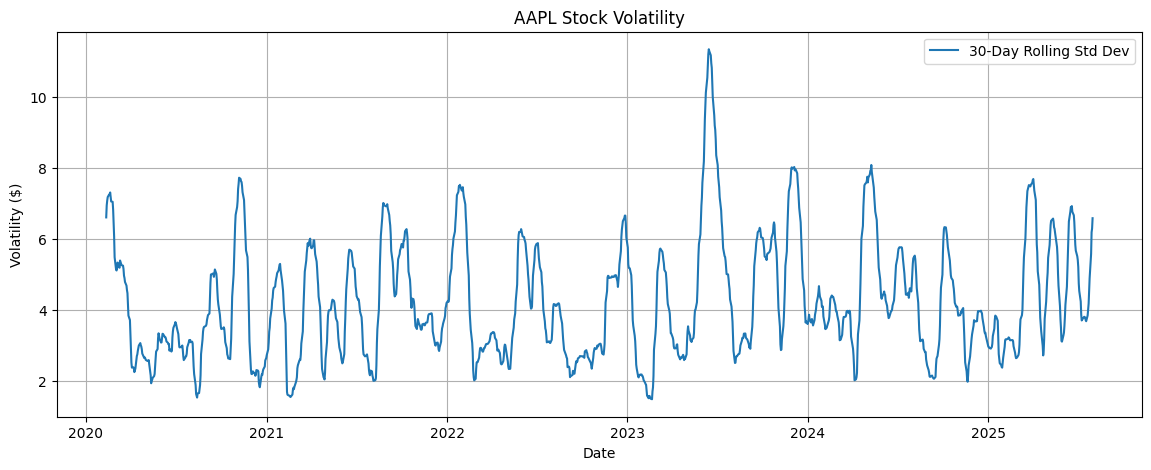

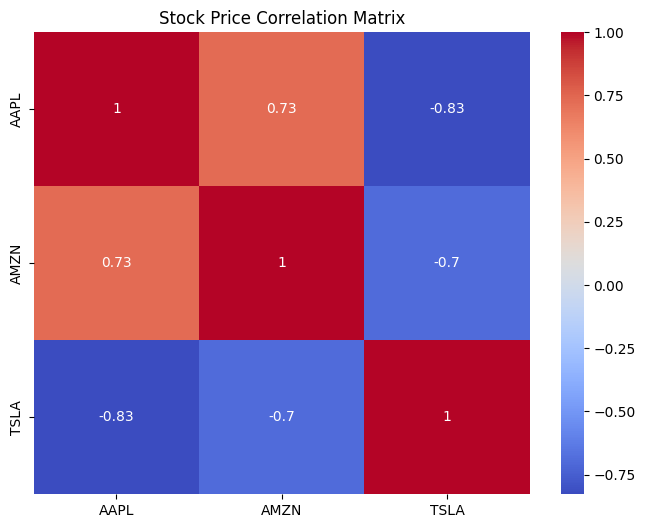

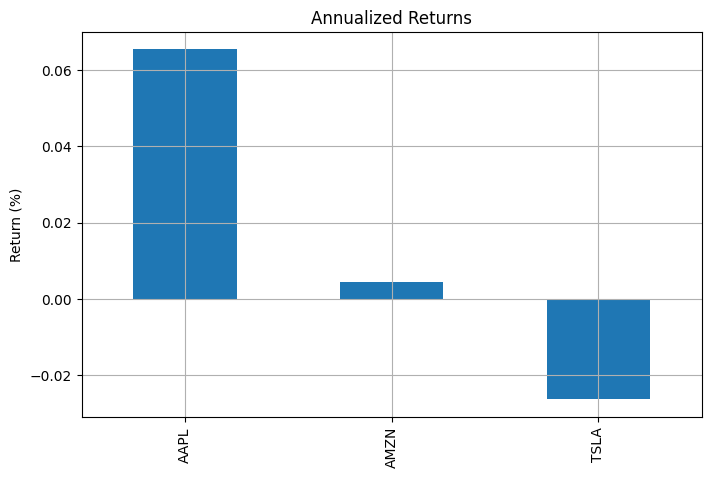

In [4]:
# Import required Python libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For advanced visualization like heatmaps
from sklearn.linear_model import LinearRegression  # For trend line using linear regression

# Load dataset
# Read the CSV file and parse 'Date' as datetime; set 'Date' as index for time series analysis
df = pd.read_csv('sample_stock_data.csv', parse_dates=['Date'], index_col='Date')

# Preview the first few rows of the data (optional)
df.head()

# -------------------------------
# Visualize Stock Price Trends
# -------------------------------

# Create a line plot for each stock to visualize price trends over time
plt.figure(figsize=(14, 6))  # Set plot size
for col in df.columns:
    plt.plot(df.index, df[col], label=col)  # Plot each stock's price over time
plt.title('Stock Prices Over Time')  # Set title
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Price ($)')  # Label for y-axis
plt.legend()  # Show legend to identify stocks
plt.grid(True)  # Add gridlines for readability
plt.show()  # Display the plot

# ---------------------------------
# Add Moving Averages for AAPL
# ---------------------------------

# Calculate 30-day moving average for AAPL stock
df['AAPL_30MA'] = df['AAPL'].rolling(window=30).mean()

# Calculate 100-day moving average for AAPL stock
df['AAPL_100MA'] = df['AAPL'].rolling(window=100).mean()

# Plot AAPL along with its 30-day and 100-day moving averages
df[['AAPL', 'AAPL_30MA', 'AAPL_100MA']].plot(figsize=(14, 6), title='AAPL Moving Averages')
plt.ylabel("Price ($)")  # Set y-axis label
plt.grid(True)  # Add gridlines
plt.show()  # Display the plot

# ------------------------------------------
# Trend Line with Linear Regression (AAPL)
# ------------------------------------------

# Create a new DataFrame for linear regression by resetting the index
df_lr = df[['AAPL']].dropna().reset_index()

# Create a new column that represents the number of days since the start date
df_lr['Days'] = (df_lr['Date'] - df_lr['Date'].min()).dt.days

# Define the independent variable (X) as 'Days'
X = df_lr[['Days']]

# Define the dependent variable (y) as 'AAPL' stock price
y = df_lr['AAPL']

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict trend values using the model
df_lr['Trend'] = model.predict(X)

# Plot AAPL actual prices and the trend line
plt.figure(figsize=(14, 6))
plt.plot(df_lr['Date'], df_lr['AAPL'], label='AAPL Actual')  # Actual price
plt.plot(df_lr['Date'], df_lr['Trend'], label='Trend Line', linestyle='--')  # Linear trend
plt.title('AAPL Linear Trend Forecast')
plt.legend()
plt.grid(True)
plt.show()

# --------------------------
# Volatility Analysis (AAPL)
# --------------------------

# Calculate rolling 30-day standard deviation for AAPL as a measure of volatility
df['AAPL_volatility'] = df['AAPL'].rolling(window=30).std()

# Plot the calculated volatility
plt.figure(figsize=(14, 5))
plt.plot(df['AAPL_volatility'], label='30-Day Rolling Std Dev')  # Plot volatility
plt.title('AAPL Stock Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility ($)')
plt.grid(True)
plt.legend()
plt.show()

# ----------------------------
# Price Correlation Heatmap
# ----------------------------

# Create a heatmap to show correlation between the three stocks
plt.figure(figsize=(8, 6))
sns.heatmap(df[['AAPL', 'AMZN', 'TSLA']].corr(), annot=True, cmap='coolwarm')  # 'annot=True' shows values
plt.title('Stock Price Correlation Matrix')
plt.show()

# ------------------------------------
# Annualized Return Comparison
# ------------------------------------

# Calculate daily percentage returns
daily_returns = df[['AAPL', 'AMZN', 'TSLA']].pct_change()

# Compute annualized returns by multiplying daily mean returns by 252 (trading days in a year)
annual_returns = daily_returns.mean() * 252

# Plot bar chart of annualized returns
annual_returns.plot(kind='bar', figsize=(8, 5), title='Annualized Returns')
plt.ylabel('Return (%)')
plt.grid(True)
plt.show()